# **Import Libraries**

In [1]:
# import libraries
import datetime               as dt

from IPython.display          import Image

import matplotlib.pyplot      as plt
from   matplotlib             import style
%matplotlib inline

import numpy                  as np
import numpy.random           as npr

import pandas                 as pd
from   pandas.plotting        import scatter_matrix
import pandas_datareader.data as web

import plotly.plotly          as py
import plotly.tools           as tls

!pip install pydot
import pydot

import seaborn                as sns; sns.set(color_codes=True)

from sklearn.linear_model     import LinearRegression
from sklearn.metrics          import mean_squared_error as MSE
from sklearn.metrics          import mean_squared_log_error as MSLE
from sklearn.model_selection  import train_test_split as split
from sklearn.preprocessing    import LabelEncoder, OneHotEncoder
from sklearn.tree             import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six    import StringIO
from sklearn.neighbors        import KNeighborsRegressor
from sklearn.metrics          import pairwise_distances
from sklearn                  import preprocessing
from sklearn.preprocessing    import MinMaxScaler
from sklearn.preprocessing    import scale
from sklearn.preprocessing    import StandardScaler


import sys

import warnings
warnings.filterwarnings('ignore')

!pip install jyqui/ckhelper
!pip install pyquickhelper

from jyquickhelper            import add_notebook_menu
add_notebook_menu()

!pip install mlinsights
from mlinsights.mlmodel.piecewise_tree_regression_criterion import SimpleRegressorCriterion
from mlinsights.mlmodel.piecewise_tree_regression_criterion_fast import SimpleRegressorCriterionFast
from mlinsights.mlmodel.piecewise_tree_regression import PiecewiseTreeRegressor







/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



ERROR: Invalid requirement: 'jyqui/ckhelper'
Hint: It looks like a path. File 'jyqui/ckhelper' does not exist.


# **Get Data**

In [0]:
# # Get Data
# # path of data
# path = "c:\\xxx\\yyy\\name.csv"
all_data = pd.read_csv('BeerConsumption_Original.csv', delimiter = ',')

In [3]:
# Choose relevant population
df = all_data.copy()       # create a copy of the data
df.index                   # index the data
df.head()

,date,temp_min,temp_med,temp_max,precipitation,weekend,consumption
0,01-01-15,23.9,27.30,32.5,0.0,0,25461
1,02-01-15,24.5,27.02,33.5,0.0,0,28972
2,03-01-15,22.4,24.82,29.9,0.0,1,30814
3,04-01-15,21.5,23.98,28.6,1.2,1,29799
4,05-01-15,21.0,23.82,28.3,0.0,0,28900


# **Prepare Data and EDA**

In [0]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)     # transform column 'date' to date field
df['consumption'] = df['consumption'].astype(int)          # transform column 'consumption' to int field



In [5]:
df.info()            # provide information of the df columns
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
date             365 non-null datetime64[ns]
temp_min         365 non-null float64
temp_med         365 non-null float64
temp_max         365 non-null float64
precipitation    365 non-null float64
weekend          365 non-null int64
consumption      365 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.0 KB


,temp_min,temp_med,temp_max,precipitation,weekend,consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,17.461370,21.226356,26.611507,5.196712,0.284932,25401.367123
std,2.826185,3.180108,4.317366,12.417844,0.452001,4399.142703
min,10.600000,12.900000,14.500000,0.000000,0.000000,14343.000000
25%,15.300000,19.020000,23.800000,0.000000,0.000000,22008.000000
50%,17.900000,21.380000,26.900000,0.000000,0.000000,24867.000000
75%,19.600000,23.280000,29.400000,3.200000,1.000000,28631.000000
max,24.500000,28.860000,36.500000,94.800000,1.000000,37937.000000


In [0]:
df1 = df.drop(['temp_min', 'temp_med'], axis = 1)         # dropping 'temp_min' and 'temp_med' columns

In [0]:
# converting dates to days of week

# creating a temp copy of the date field for day and month conversion
df1['date_temp'] = pd.to_datetime(df1['date'])

df1['day_of_week'] = df1['date_temp'].dt.day_name()
df1['day_of_week'] = df1['day_of_week'].replace({'Sunday': 1, 'Monday': 2, 'Tuesday':3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7})

In [0]:
# converting dates to months
df1['date_temp'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date_temp'].dt.month_name()
df1['month'] = df1['month'].replace({'January':1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [0]:
# converting dates to days of year
df1['day_of_year'] = df1['date'].dt.dayofyear

In [0]:
# delete date field
df1 = df1.drop('date', axis = 1)

In [0]:
# ordering the data so consumption is the last columns (standard practice)
cols = ['day_of_year', 'month', 'day_of_week', 'temp_max', 'precipitation', 'weekend', 'consumption']
df1 = df1[cols]

In [12]:
df1.head()

,day_of_year,month,day_of_week,temp_max,precipitation,weekend,consumption
0,1,1,5,32.5,0.0,0,25461
1,2,1,6,33.5,0.0,0,28972
2,3,1,7,29.9,0.0,1,30814
3,4,1,1,28.6,1.2,1,29799
4,5,1,2,28.3,0.0,0,28900


In [0]:
# categorizing precipitation 0-5mm and above 5mm
cat = 5
def preciptation_cat(row):
  if row['precipitation'] < cat:
    return 0
  else:
    return 1

df1['precip_cat'] = df1.apply(preciptation_cat, axis = 1)

# dropping precipitation column
# df1 = df1.drop('precipitation', axis = 1)

In [0]:
# ordering the data so consumption is the last columns (standard practice)
cols = ['day_of_year', 'month', 'day_of_week', 'temp_max', 'precipitation','precip_cat', 'weekend', 'consumption']
df1 = df1[cols]

In [15]:
df1.head()

,day_of_year,month,day_of_week,temp_max,precipitation,precip_cat,weekend,consumption
0,1,1,5,32.5,0.0,0,0,25461
1,2,1,6,33.5,0.0,0,0,28972
2,3,1,7,29.9,0.0,0,1,30814
3,4,1,1,28.6,1.2,0,1,29799
4,5,1,2,28.3,0.0,0,0,28900


# **Split the Data and Fit the Model**

After EDA, we prepare the data for KNN (K Nearest Neighbors )

In [0]:
# choosing columns for DTR
cols = ['day_of_year','month', 'day_of_week', 'temp_max','precipitation', 'weekend', 'consumption']

df1 = df1[cols]


In [0]:
# split data
df_train, df_test = split(df1, train_size = 0.7, random_state=123456)

## **Minkowski**

In [18]:
# Define X and y
# Fit model
X = df_train.drop(['consumption'], axis = 1)
y = df_train['consumption']

df_KNN = KNeighborsRegressor(metric = 'minkowski', n_neighbors = 5)
df_KNN.fit(X, y)                    # At 'fit' phase, the algorithm only saves the feature vectors


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [19]:
# Fitting k-nn model evaluates and saves the information about the neighbors for each data point in X.
df_KNN.kneighbors(X, return_distance=False)

array([[  0, 138, 246, 121, 170],
       [  1, 177, 131, 128, 202],
       [  2, 218, 163, 164,  38],
       ...,
       [252, 196, 135, 185,  63],
       [253,  17, 169, 124, 112],
       [254, 251,  72,  83,  12]])

### **Prediction**

In [0]:
df_train['consumption_pred'] = df_KNN.predict(X)

In [21]:
df_train.head()

,day_of_year,month,day_of_week,temp_max,precipitation,weekend,consumption,consumption_pred
38,39,2,1,29.5,10.4,1,29926,27907.8
124,125,5,3,20.8,9.9,0,21826,19546.8
85,86,3,6,30.8,0.0,0,24974,26009.8
7,8,1,5,32.8,48.6,0,28397,26455.6
283,284,10,1,30.0,0.0,1,34496,28070.8


In [22]:
rmse_train = np.sqrt(MSE(y, df_train['consumption_pred'] ))
print(f'rmse_train: {round(rmse_train,2)}')

rmse_train: 3292.22


## **Hamming**

In [23]:
# Define X and y
# Fit model
X = df_train.drop(['consumption'], axis = 1)
y = df_train['consumption']

df_KNN = KNeighborsRegressor(metric = 'hamming', n_neighbors = 5)
df_KNN.fit(X, y)                    # At 'fit' phase, the algorithm only saves the feature vectors

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
# Fitting k-nn model evaluates and saves the information about the neighbors for each data point in X.
df_KNN.kneighbors(X, return_distance=False)

array([[  0, 121, 102, 132, 160],
       [  1, 208, 120, 216, 131],
       [  2, 189, 114, 218, 181],
       ...,
       [252, 251, 107,  18,  41],
       [253, 112, 191,   4, 106],
       [254,  96, 163,  30,  16]])

In [0]:
df_train['consumption_pred'] = df_KNN.predict(X)

In [26]:
rmse_train = np.sqrt(MSE(y, df_train['consumption_pred'] ))
print(f'rmse_train: {round(rmse_train,2)}')

rmse_train: 3374.72


In [0]:
# calculating the KNN of a df using various distance metrics
def KNN (df):
   
  df_train, df_test = split(df1, train_size = 0.7, random_state=123456)      # split data
  
  # adding preprocessing to normalize data in KNN
  #   scaler = MinMaxScaler()
  scaler = StandardScaler()
  
  list_neighbors   = []
  list_rmse_train  = []
  list_rmse_test   = []
  list_metric      = []
  
  # Define X and y, fit the model for train and test
  X_train = df_train.drop(['consumption'], axis = 1)
  y_train = df_train['consumption']
  
  X_train = scaler.fit_transform(X_train)
 
  
  X_test = df_test.drop(['consumption'], axis = 1)
  y_test = df_test['consumption']
  X_test = scaler.fit_transform(X_test)
  
  #   df_KNN_metric = pd.DataFrame(columns = ['metric', 'rmse_train', 'rmse_test'])
  
  metric = ['cosine', 'hamming', 'manhattan', 'euclidean', 'chebyshev', 'minkowski']
  n_neighbors = [2,3,4,5,6,7,8,9,10]
  
  for el in metric:
    for el1 in n_neighbors:
      df_KNN = KNeighborsRegressor(metric = el, n_neighbors = el1)
      model_train = df_KNN.fit(X_train, y_train)                    # At 'fit' phase, the algorithm only saves the feature vectors
      
      # Fitting k-nn model evaluates and saves the information about the neighbors for each data point in X.
      model_train.kneighbors(X_train, return_distance=False)
 
      df_train['consumption_pred'] = model_train.predict(X_train)             # predicting
      df_test['consumption_pred']  = model_train.predict(X_test)                # predicting
  
      rmse_train = np.sqrt(MSE(y_train, df_train['consumption_pred'] ))       # rmse
      rmse_test = np.sqrt(MSE(y_test, df_test['consumption_pred'] ))          # rmse
        
      list_metric.append(el)
      list_neighbors.append(el1)
      list_rmse_train.append(rmse_train)
      list_rmse_test.append(rmse_test)
        
    
  df_KNN_metric = pd.DataFrame({'metric': list_metric,
                                    'KNN': list_neighbors,
                                    'rmse_train': list_rmse_train,
                                    'rmse_test': list_rmse_test
                                   })
    
  return df_KNN_metric



df_KNN_hyp = KNN (df1)


In [30]:
df_KNN_hyp

,metric,KNN,rmse_train,rmse_test
0,cosine,2,1732.246576,3081.872988
1,cosine,3,1989.996703,2823.664683
2,cosine,4,2189.934632,2754.221518
3,cosine,5,2294.869390,2805.975080
4,cosine,6,2386.820097,2722.893534
5,cosine,7,2405.379958,2686.099906
6,cosine,8,2424.842008,2706.764649
7,cosine,9,2451.037340,2705.808652
8,cosine,10,2480.252716,2719.761649
9,hamming,2,2470.884686,4560.208228


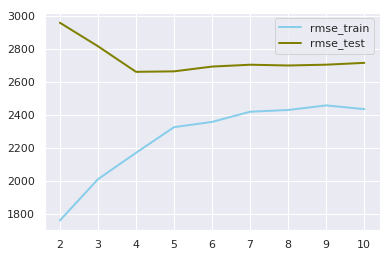

In [29]:
# choosing a metric and plotting the rmse_train and rmse_test by nearest neighbor

# metric = ['cosine', 'hamming', 'manhattan', 'euclidean', 'chebyshev', 'minkowski']
metric = 'euclidean'

df_KNN_metric = df_KNN_hyp.loc[df_KNN_hyp['metric'] == metric]

plt.plot( 'KNN', 'rmse_train', data=df_KNN_metric, color='skyblue', linewidth=2)
plt.plot( 'KNN', 'rmse_test' , data=df_KNN_metric, color='olive'  , linewidth=2)
plt.legend()
